C:\Users\Ubaid-khan\AppData\Local\Temp\ipykernel_9248\1629946024.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AGE', y='COUNT', hue='SENSITIVITY', data=grouped_data, ci=None, estimator=sum)


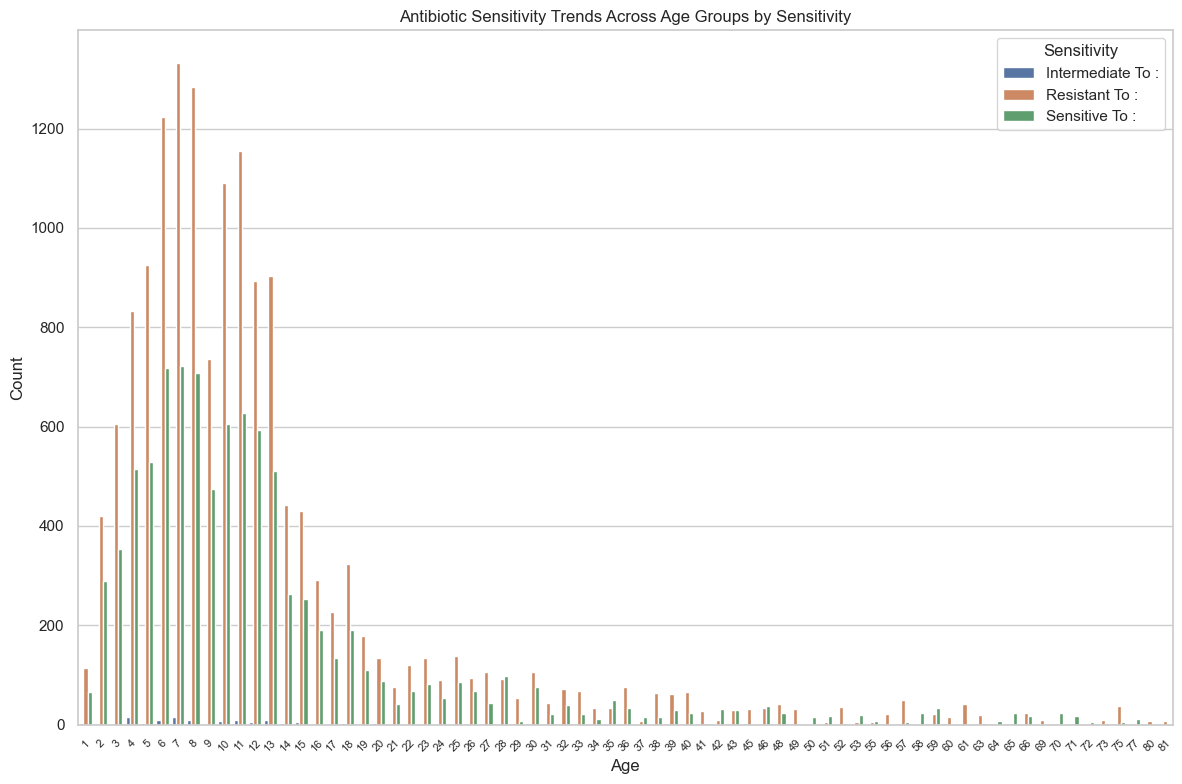

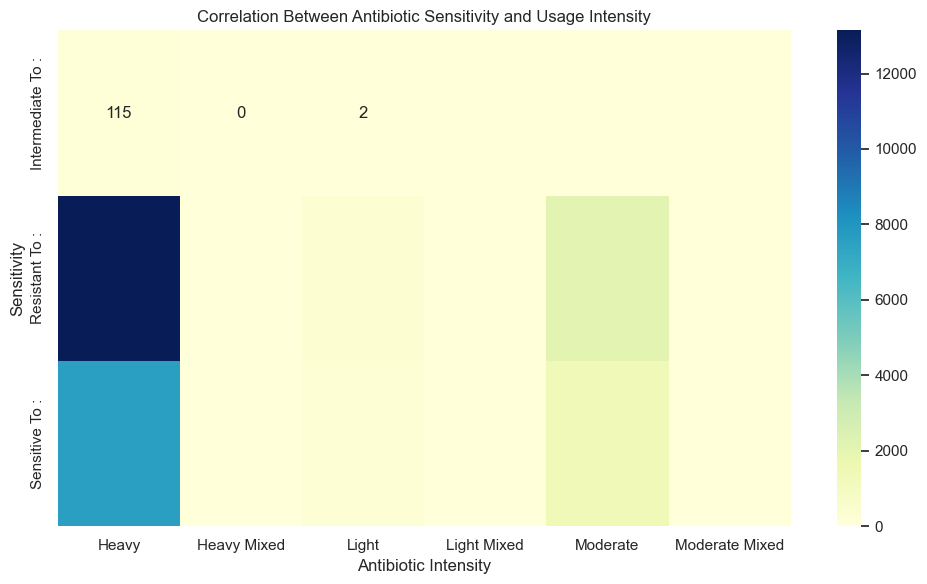

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('E:\\Data Analysis\\SalmonellaTyphi.xlsx')

# Ensure AGE column is in string format, then extract numerical value and convert to int
df['AGE'] = df['AGE'].astype(str).str.extract('(\d+)').astype(int)

# Group the data by age, sensitivity, antibiotic, and intensity
grouped_data = df.groupby(['AGE', 'SENSITIVITY', 'ANTIBIOTIC', 'INTENSITY']).size().reset_index(name='COUNT')

# Plot trends in antibiotic sensitivity across age groups and intensity
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='AGE', y='COUNT', hue='SENSITIVITY', data=grouped_data, ci=None, estimator=sum)
plt.title('Antibiotic Sensitivity Trends Across Age Groups by Sensitivity')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8)
plt.legend(title='Sensitivity', loc='upper right')
plt.tight_layout()
plt.show()

# Correlation analysis between sensitivity trends and antibiotic usage intensity
correlation_data = df.groupby(['SENSITIVITY', 'INTENSITY']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Correlation Between Antibiotic Sensitivity and Usage Intensity')
plt.xlabel('Antibiotic Intensity')
plt.ylabel('Sensitivity')
plt.tight_layout()
plt.show()


C:\Users\Ubaid-khan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


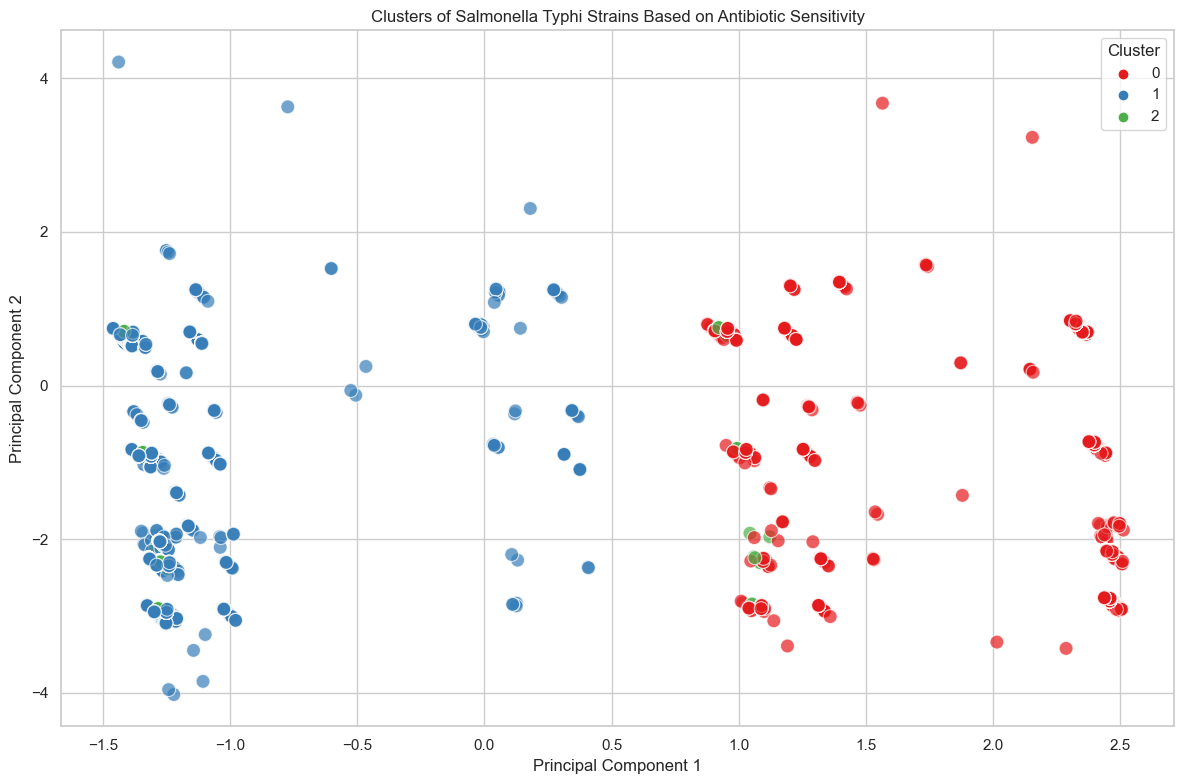

In [2]:
#Clustering Task: Identifying clusters of Salmonella Typhi strains based on antibiotic sensitivity and other features
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_excel('E:\\Data Analysis\\SalmonellaTyphi.xlsx')

# Ensure AGE column is in string format, then extract numerical value and convert to int
df['AGE'] = df['AGE'].astype(str).str.extract('(\d+)').astype(int)

# Select features for clustering
features = ['AGE', 'SENSITIVITY', 'ANTIBIOTIC', 'INTENSITY']
df_clustering = df[features]

# Convert categorical variables to numerical
df_clustering = pd.get_dummies(df_clustering, columns=['SENSITIVITY', 'ANTIBIOTIC', 'INTENSITY'])

# Standardize the features
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_clustering_scaled)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_clustering_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1', s=100, alpha=0.7)
plt.title('Clusters of Salmonella Typhi Strains Based on Antibiotic Sensitivity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('E:\\Data Analysis\\SalmonellaTyphi.xlsx')

print(df.head())

         AGE          ORGANISM     SENSITIVITY       ANTIBIOTIC INTENSITY
0  1 Year(s)  Salmonella typhi  Resistant To :       Ampicillin     Heavy
1  1 Year(s)  Salmonella typhi  Resistant To :       Ampicillin     Light
2  1 Year(s)  Salmonella typhi  Resistant To :       Ampicillin     Heavy
3  1 Year(s)  Salmonella typhi  Resistant To :  Chloramphenicol     Heavy
4  1 Year(s)  Salmonella typhi  Sensitive To :         Amikacin     Heavy


In [4]:
# Check the structure of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29319 entries, 0 to 29318
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AGE          29319 non-null  object
 1   ORGANISM     28278 non-null  object
 2   SENSITIVITY  28278 non-null  object
 3   ANTIBIOTIC   28278 non-null  object
 4   INTENSITY    24897 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB
None


In [5]:
# Summary statistics for numerical columns
print(df.describe())

              AGE          ORGANISM     SENSITIVITY ANTIBIOTIC INTENSITY
count       29319             28278           28278      28278     24897
unique         80                 1               3         22         6
top     7 Year(s)  Salmonella typhi  Resistant To :  Meropenem     Heavy
freq         2397             28278           17620       3148     20805


In [6]:
# Unique values in categorical columns
print(df['ORGANISM'].unique())
print(df['SENSITIVITY'].unique())
print(df['ANTIBIOTIC'].unique())
print(df['INTENSITY'].unique())

['Salmonella typhi' nan]
['Resistant To :' 'Sensitive To :' 'Intermediate To :' nan]
['Ampicillin' 'Chloramphenicol' 'Amikacin' 'Cefixime' 'Ceftriaxone'
 'Imipenem' 'Meropenem' 'Ciprofloxacin' 'Co-trimoxazole' 'Levofloxacin'
 'Azithromycin' 'Piperacillin' 'Moxifloxacin' 'Cefotaxime' 'Co-amoxiclav'
 'Cotrimoxazole' 'Cefoperazone/Sulbactam' 'Piperacillin+Tazobactam'
 'Cefepime' 'Ceftazidime' 'Amoxacillin' 'Cefuroxime' nan]
['Heavy' 'Light' nan 'Moderate' 'Heavy Mixed' 'Moderate Mixed'
 'Light Mixed']


C:\Users\Ubaid-khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ubaid-khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


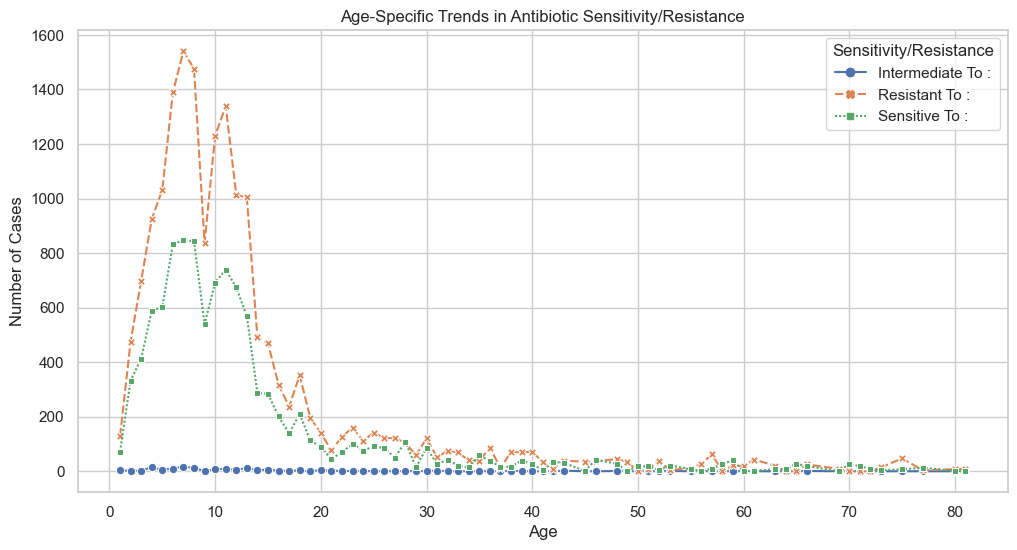

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('E:\\Data Analysis\\SalmonellaTyphi.xlsx')

# Filter relevant columns
df_age_sensitivity = df[['AGE', 'SENSITIVITY']]

# Drop rows with missing values in AGE or SENSITIVITY
df_age_sensitivity = df_age_sensitivity.dropna(subset=['AGE', 'SENSITIVITY'])

# Convert AGE column to numeric (assuming it contains numerical values)
df_age_sensitivity['AGE'] = df_age_sensitivity['AGE'].str.extract('(\d+)').astype(float)

# Group by age and sensitivity/resistance and count occurrences
age_sensitivity_counts = df_age_sensitivity.groupby(['AGE', 'SENSITIVITY']).size().unstack(fill_value=0)

# Plot age-specific trends in sensitivity/resistance
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_sensitivity_counts, markers=True)
plt.title('Age-Specific Trends in Antibiotic Sensitivity/Resistance')
plt.xlabel('Age')
plt.ylabel('Number of Cases')
plt.legend(title='Sensitivity/Resistance')
plt.grid(True)
plt.show()


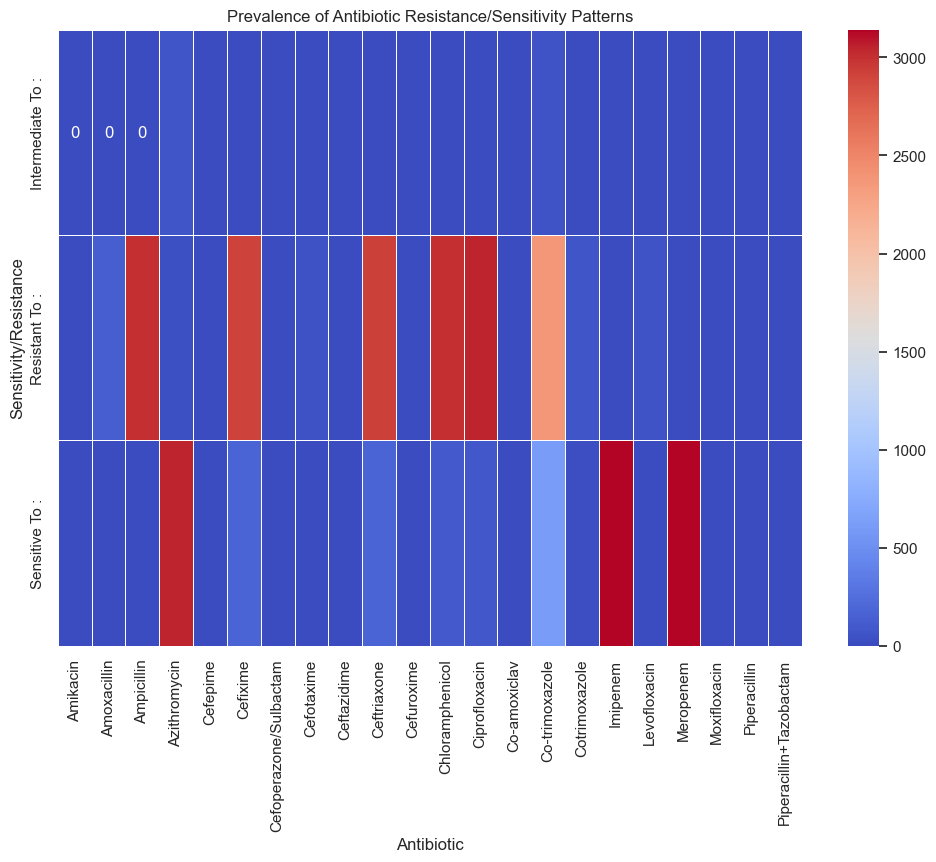

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('E:\\Data Analysis\\SalmonellaTyphi.xlsx')

# Filter relevant columns
df_sensitivity_antibiotic = df[['SENSITIVITY', 'ANTIBIOTIC']]

# Drop rows with missing values in SENSITIVITY or ANTIBIOTIC
df_sensitivity_antibiotic = df_sensitivity_antibiotic.dropna(subset=['SENSITIVITY', 'ANTIBIOTIC'])

# Group by sensitivity/resistance and antibiotic and count occurrences
sensitivity_antibiotic_counts = df_sensitivity_antibiotic.groupby(['SENSITIVITY', 'ANTIBIOTIC']).size().unstack(fill_value=0)

# Plot prevalence of antibiotic resistance/sensitivity patterns
plt.figure(figsize=(12, 8))
sns.heatmap(sensitivity_antibiotic_counts, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Prevalence of Antibiotic Resistance/Sensitivity Patterns')
plt.xlabel('Antibiotic')
plt.ylabel('Sensitivity/Resistance')
plt.show()


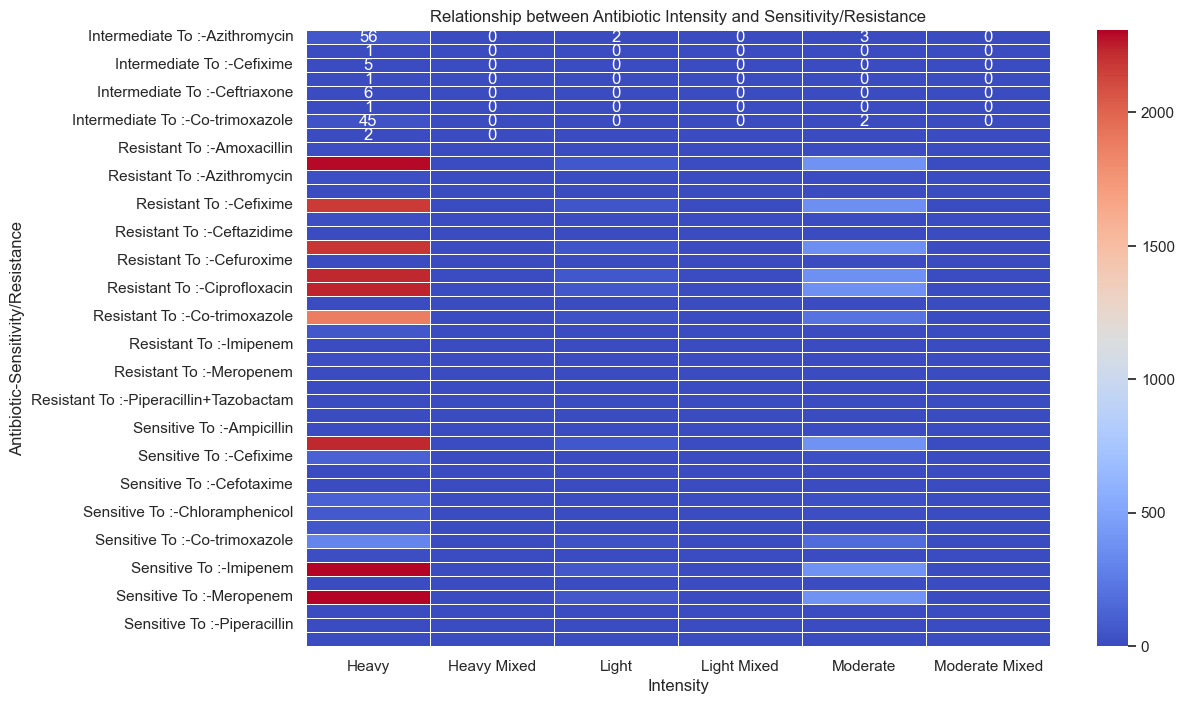

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('E:\\Data Analysis\\SalmonellaTyphi.xlsx')

# Filter relevant columns
df_intensity = df[['SENSITIVITY', 'ANTIBIOTIC', 'INTENSITY']]

# Drop rows with missing values in SENSITIVITY, ANTIBIOTIC, or INTENSITY
df_intensity = df_intensity.dropna(subset=['SENSITIVITY', 'ANTIBIOTIC', 'INTENSITY'])

# Group by sensitivity/resistance, antibiotic, and intensity and count occurrences
intensity_counts = df_intensity.groupby(['SENSITIVITY', 'ANTIBIOTIC', 'INTENSITY']).size().unstack(fill_value=0)

# Plot relationship between antibiotic intensity and sensitivity/resistance
plt.figure(figsize=(12, 8))
sns.heatmap(intensity_counts, cmap='coolwarm', annot=True, fmt='d', linewidths=.5)
plt.title('Relationship between Antibiotic Intensity and Sensitivity/Resistance')
plt.xlabel('Intensity')
plt.ylabel('Antibiotic-Sensitivity/Resistance')
plt.show()


C:\Users\Ubaid-khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ubaid-khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


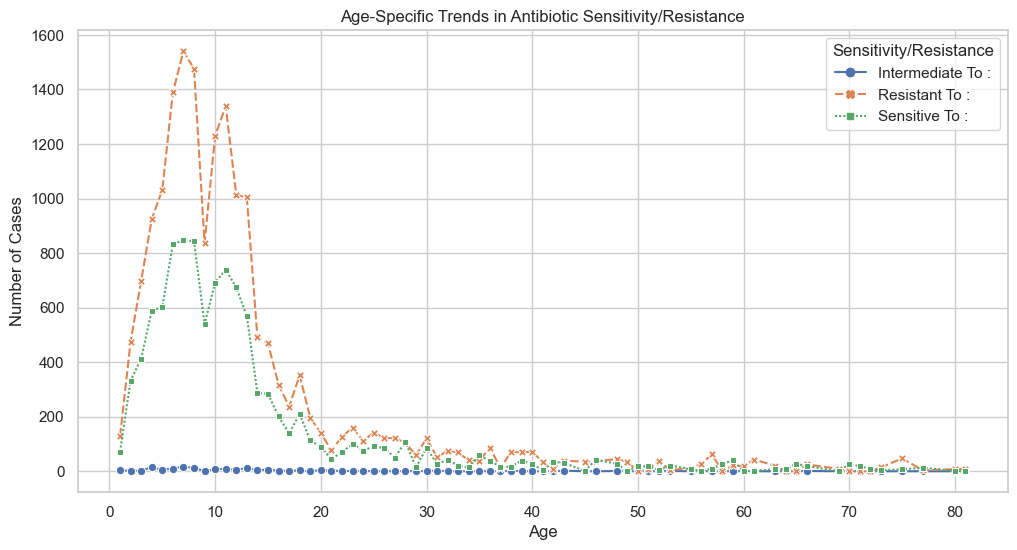

C:\Users\Ubaid-khan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


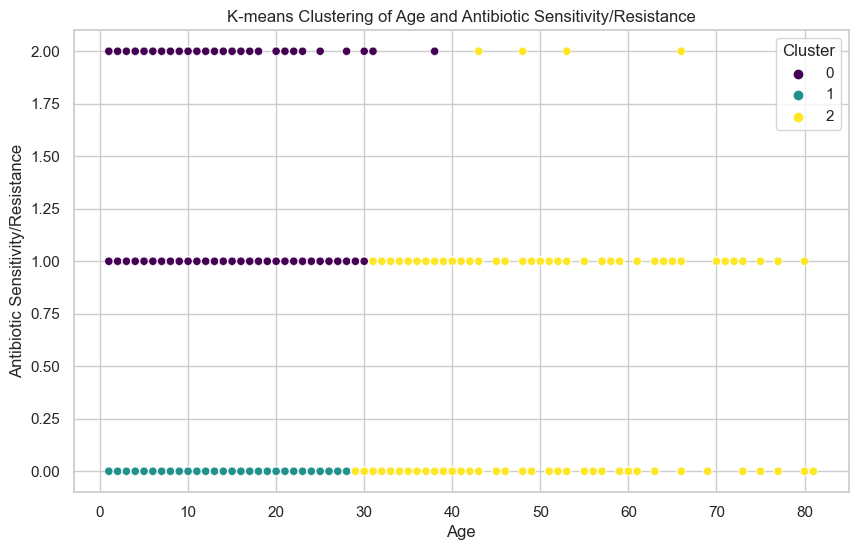

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_excel('E:\\Data Analysis\\SalmonellaTyphi.xlsx')

# Filter relevant columns
df_clustering = df[['AGE', 'SENSITIVITY']]

# Drop rows with missing values in AGE or SENSITIVITY
df_clustering = df_clustering.dropna(subset=['AGE', 'SENSITIVITY'])

# Convert AGE column to numeric (assuming it contains numerical values)
df_clustering['AGE'] = df_clustering['AGE'].str.extract('(\d+)').astype(float)

# Encode SENSITIVITY column as numeric values
sensitivity_mapping = {'Resistant To :': 0, 'Sensitive To :': 1, 'Intermediate To :': 2}
df_clustering['SENSITIVITY'] = df_clustering['SENSITIVITY'].map(sensitivity_mapping)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clustering)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_clustering['cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='SENSITIVITY', hue='cluster', data=df_clustering, palette='viridis', legend='full')
plt.title('K-means Clustering of Age and Antibiotic Sensitivity/Resistance')
plt.xlabel('Age')
plt.ylabel('Antibiotic Sensitivity/Resistance')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


C:\Users\Ubaid-khan\AppData\Local\Temp\ipykernel_14292\3020192919.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['AGE'], shade=True, color='skyblue')
C:\Users\Ubaid-khan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


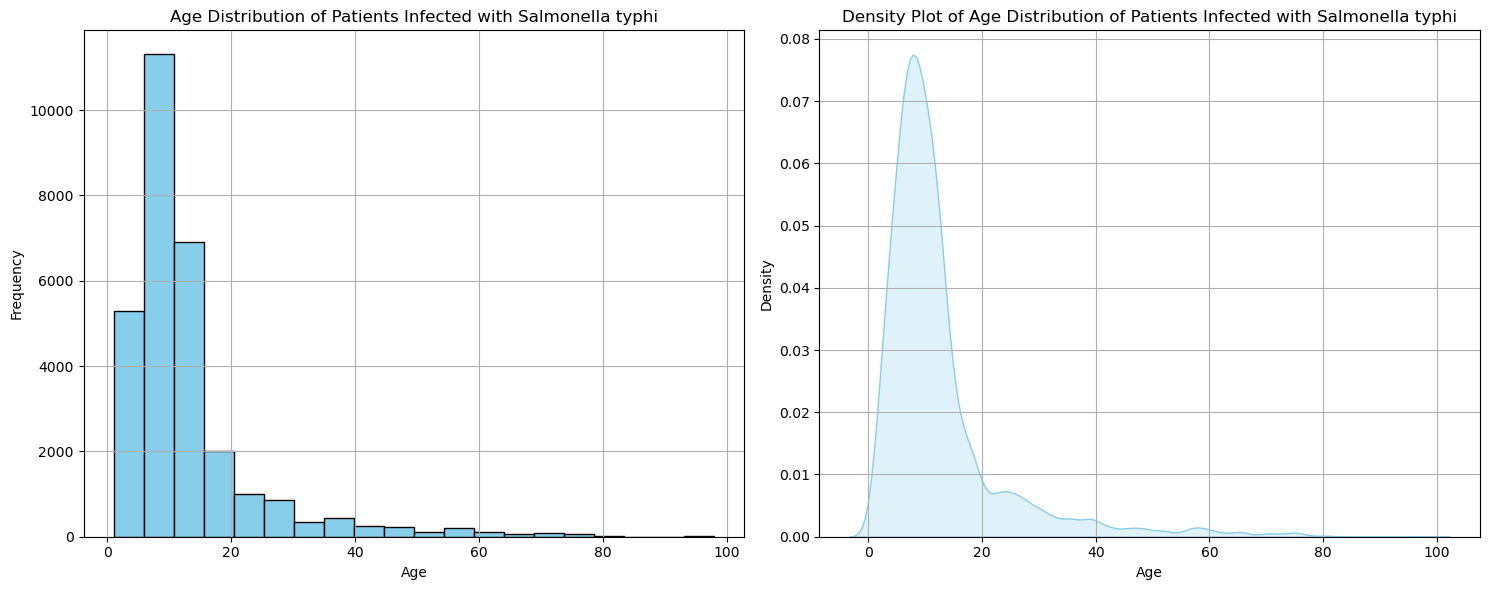

Antibiotic Sensitivity in Children:
SENSITIVITY              Intermediate To :  Resistant To :  Sensitive To :
ANTIBIOTIC                                                                
Amikacin                          0.000000        0.300000        0.700000
Amoxacillin                       0.000000        0.991453        0.008547
Ampicillin                        0.000000        0.998014        0.001986
Azithromycin                      0.020747        0.007544        0.971709
Cefepime                          0.166667        0.833333        0.000000
Cefixime                          0.001569        0.941961        0.056471
Cefoperazone/Sulbactam            0.000000        0.000000        1.000000
Cefotaxime                        0.024390        0.902439        0.073171
Ceftazidime                       0.000000        1.000000        0.000000
Ceftriaxone                       0.001933        0.940472        0.057596
Cefuroxime                        0.000000        1.000000      

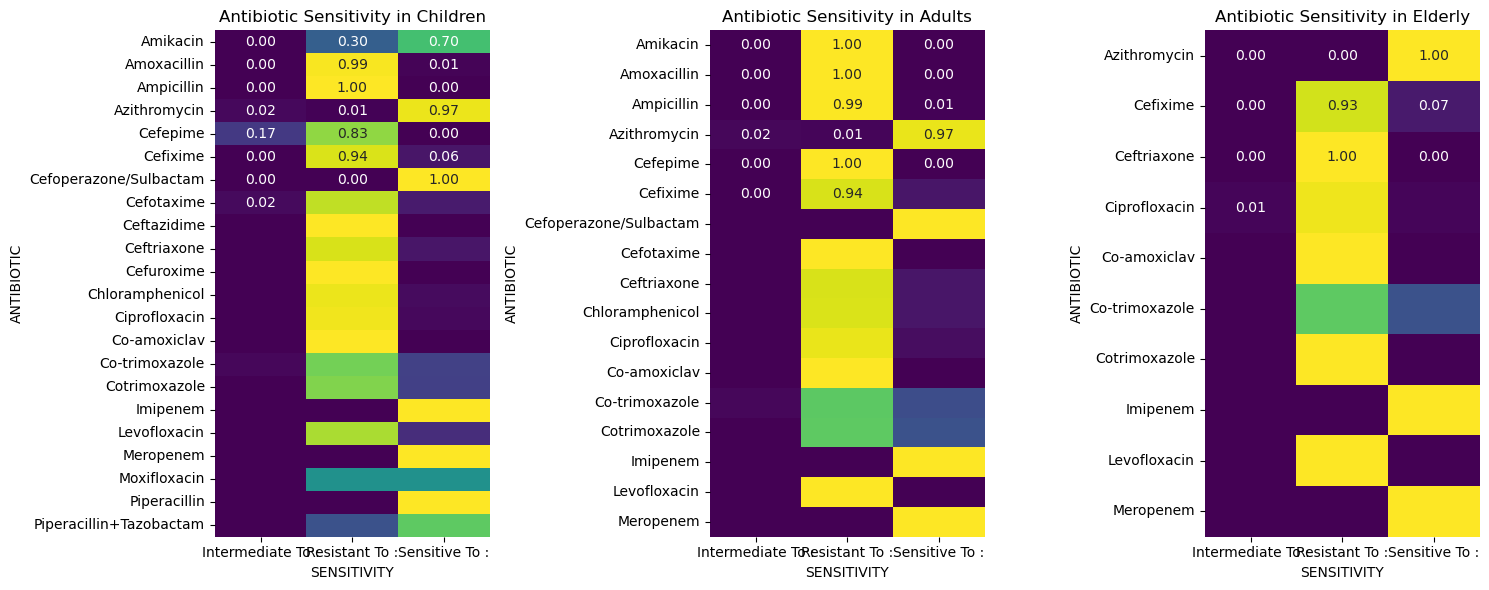

In [17]:
#What are the most effective antibiotics for treating Salmonella typhi infections in pediatric, adult, and elderly patients?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('E:\\Data Analysis\\SalmonellaTyphi.xlsx')

# Ensure AGE column is in string format, then extract numerical value and convert to int
df['AGE'] = df['AGE'].astype(str).str.extract('(\d+)').astype(int)

# Visualize the age distribution using histograms and density plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(df['AGE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients Infected with Salmonella typhi')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.kdeplot(df['AGE'], shade=True, color='skyblue')
plt.title('Density Plot of Age Distribution of Patients Infected with Salmonella typhi')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)

plt.tight_layout()
plt.show()

# Group data by age groups
children = df[df['AGE'] < 18]
adults = df[(df['AGE'] >= 18) & (df['AGE'] <= 65)]
elderly = df[df['AGE'] > 65]

# Analyze antibiotic sensitivity within each age group
def analyze_antibiotic_sensitivity(df):
    antibiotic_sensitivity = df.groupby('ANTIBIOTIC')['SENSITIVITY'].value_counts(normalize=True).unstack().fillna(0)
    return antibiotic_sensitivity

children_antibiotic_sensitivity = analyze_antibiotic_sensitivity(children)
adults_antibiotic_sensitivity = analyze_antibiotic_sensitivity(adults)
elderly_antibiotic_sensitivity = analyze_antibiotic_sensitivity(elderly)

# Print antibiotic sensitivity analysis results
print("Antibiotic Sensitivity in Children:")
print(children_antibiotic_sensitivity.to_string())
print("\nAntibiotic Sensitivity in Adults:")
print(adults_antibiotic_sensitivity.to_string())
print("\nAntibiotic Sensitivity in Elderly:")
print(elderly_antibiotic_sensitivity.to_string())

# Visualize antibiotic sensitivity results for children
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.heatmap(children_antibiotic_sensitivity, annot=True, cmap='viridis', fmt='.2f', cbar=False)
plt.title('Antibiotic Sensitivity in Children')

plt.subplot(1, 3, 2)
sns.heatmap(adults_antibiotic_sensitivity, annot=True, cmap='viridis', fmt='.2f', cbar=False)
plt.title('Antibiotic Sensitivity in Adults')

plt.subplot(1, 3, 3)
sns.heatmap(elderly_antibiotic_sensitivity, annot=True, cmap='viridis', fmt='.2f', cbar=False)
plt.title('Antibiotic Sensitivity in Elderly')

plt.tight_layout()
plt.show()


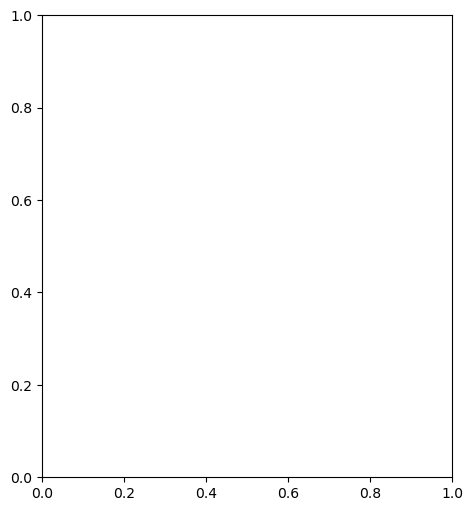

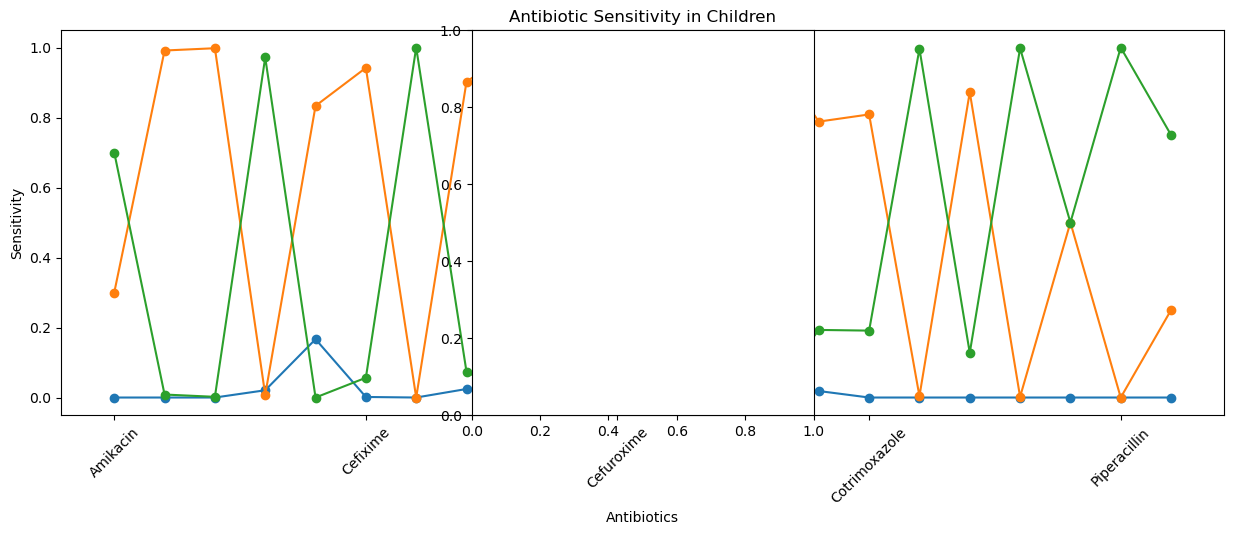

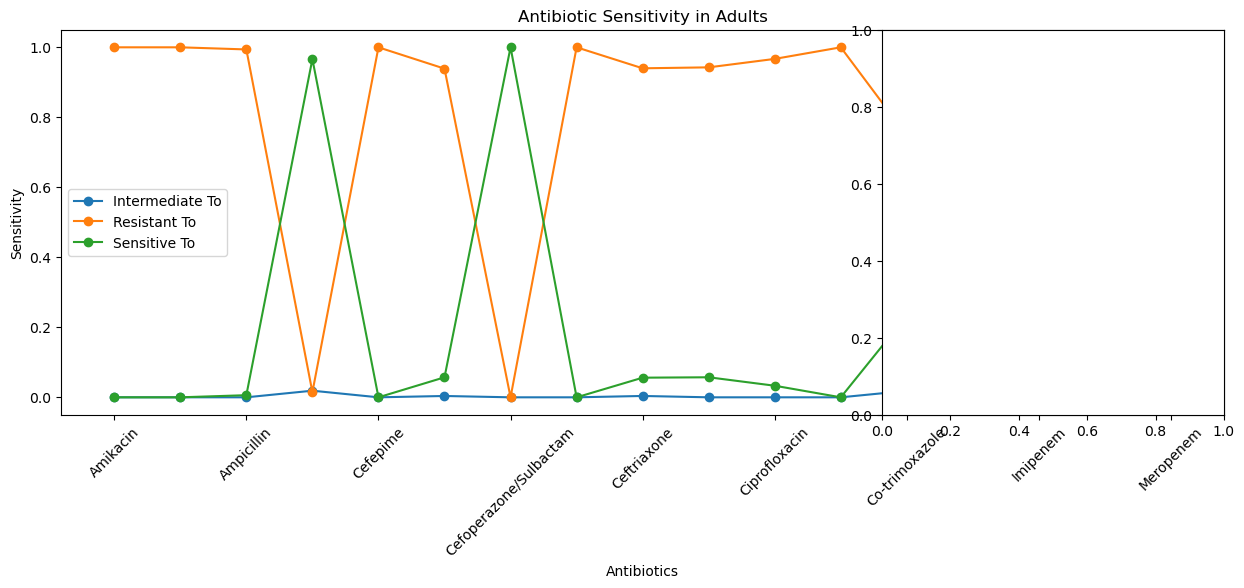

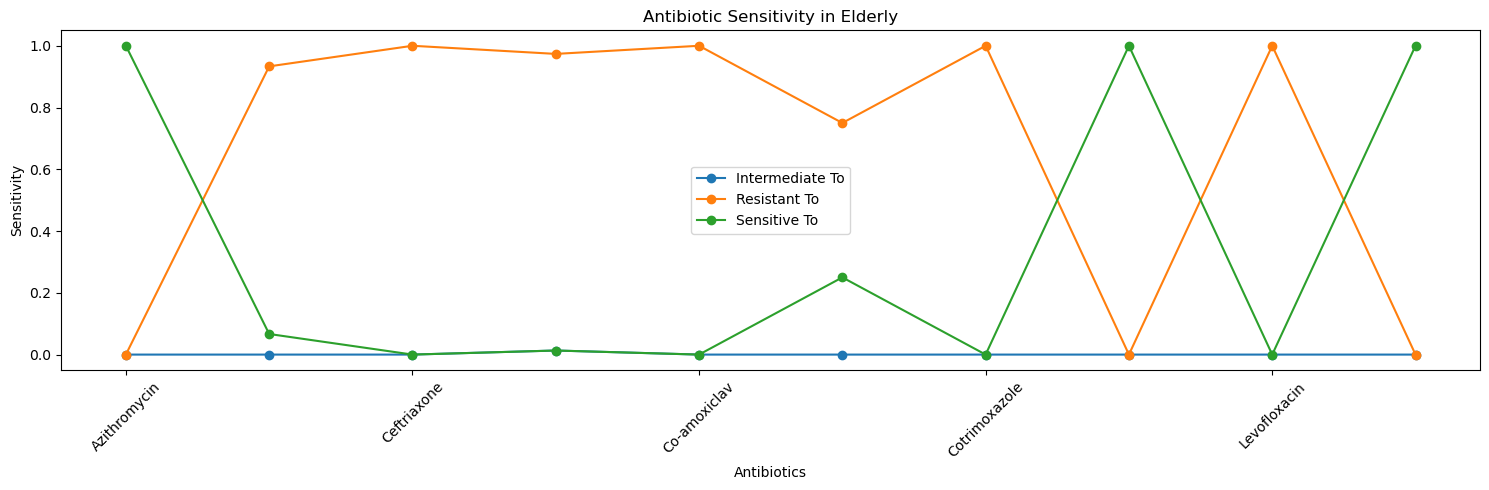

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('E:\\Data Analysis\\SalmonellaTyphi.xlsx')
print(df.head())



         AGE          ORGANISM     SENSITIVITY       ANTIBIOTIC INTENSITY
0  1 Year(s)  Salmonella typhi  Resistant To :       Ampicillin     Heavy
1  1 Year(s)  Salmonella typhi  Resistant To :       Ampicillin     Light
2  1 Year(s)  Salmonella typhi  Resistant To :       Ampicillin     Heavy
3  1 Year(s)  Salmonella typhi  Resistant To :  Chloramphenicol     Heavy
4  1 Year(s)  Salmonella typhi  Sensitive To :         Amikacin     Heavy


In [5]:
# Basic statistics and data types
print(df.info())

# Summary statistics for numerical columns
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29319 entries, 0 to 29318
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AGE          29319 non-null  object
 1   ORGANISM     28278 non-null  object
 2   SENSITIVITY  28278 non-null  object
 3   ANTIBIOTIC   28278 non-null  object
 4   INTENSITY    24897 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB
None
              AGE          ORGANISM     SENSITIVITY ANTIBIOTIC INTENSITY
count       29319             28278           28278      28278     24897
unique         80                 1               3         22         6
top     7 Year(s)  Salmonella typhi  Resistant To :  Meropenem     Heavy
freq         2397             28278           17620       3148     20805


In [14]:
# Display unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()


Unique values in column 'AGE':
['1 Year(s)' '10 Year(s)' '11 Month(s)' '11 Year(s)' '12 Year(s)'
 '13 Year(s)' '14 Year(s)' '15 Year(s)' '16 Year(s)' '17 Year(s)'
 '18 Year(s)' '19 Year(s)' '2 Year(s)' '20 Year(s)' '21 Year(s)'
 '22 Year(s)' '23 Year(s)' '24 Year(s)' '25 Year(s)' '26 Year(s)'
 '27 Year(s)' '28 Year(s)' '29 Year(s)' '3 Month(s)' '3 Year(s)'
 '30 Year(s)' '31 Year(s)' '32 Year(s)' '33 Year(s)' '34 Year(s)'
 '35 Year(s)' '36 Year(s)' '37 Year(s)' '38 Year(s)' '39 Year(s)'
 '4 Month(s)' '4 Year(s)' '40 Year(s)' '41 Year(s)' '42 Year(s)'
 '43 Year(s)' '45 Year(s)' '46 Year(s)' '48 Year(s)' '49 Year(s)'
 '5 Month(s)' '5 Year(s)' '50 Year(s)' '51 Year(s)' '52 Year(s)'
 '53 Year(s)' '55 Year(s)' '56 Year(s)' '57 Year(s)' '58 Year(s)'
 '59 Year(s)' '6 Month(s)' '6 Year(s)' '60 Year(s)' '61 Year(s)'
 '63 Year(s)' '64 Year(s)' '65 Year(s)' '66 Year(s)' '69 Year(s)'
 '7 Month(s)' '7 Year(s)' '70 Year(s)' '71 Year(s)' '72 Year(s)'
 '73 Year(s)' '75 Year(s)' '77 Year(s)' '8 Month(s)

In [15]:
# Define a function to convert age to years
def convert_age_to_years(age_str):
    if 'Year' in age_str:
        return int(age_str.split()[0])
    elif 'Month' in age_str:
        months = int(age_str.split()[0])
        return round(months / 12, 2)  # Convert months to years and round to 2 decimal places

# Apply the function to the 'AGE' column
df['AGE'] = df['AGE'].apply(convert_age_to_years)

# Display the first few rows of the updated dataframe
print(df['AGE'].head())

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: AGE, dtype: float64


In [16]:
# Display a sample of rows from the 'AGE' column
print(df['AGE'].sample(10))


27193     9.0
4381     12.0
25149     8.0
5103     12.0
9777     17.0
14993    32.0
8874     15.0
9753     17.0
13319    28.0
9850     17.0
Name: AGE, dtype: float64


In [17]:
print(df.head())

   AGE          ORGANISM     SENSITIVITY       ANTIBIOTIC INTENSITY
0  1.0  Salmonella typhi  Resistant To :       Ampicillin     Heavy
1  1.0  Salmonella typhi  Resistant To :       Ampicillin     Light
2  1.0  Salmonella typhi  Resistant To :       Ampicillin     Heavy
3  1.0  Salmonella typhi  Resistant To :  Chloramphenicol     Heavy
4  1.0  Salmonella typhi  Sensitive To :         Amikacin     Heavy
